# Project 3 - Part 2b - Exploratory Data Analysis

Tijesunimi Odebode

5/1/2022

## Purpose of Part 2b

<i> In this part, we will perform some exploratory data analysis to show the following:
    
a. How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
  <i> Note: <i> We will exclude any movies with 0's for budget AND revenue from the remaining visualizations.
    
      
b. How many movies are there in each of the certification categories (G/PG/PG-13/R etc.)?
    
      
c. What is the average revenue per certification category?
    
      
d. What is the average budget per certification category?

In [1]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Additional Imports
import os, json, math, time
from yelpapi import YelpAPI
from tqdm.notebook import tqdm_notebook

In [2]:
tmd_2010 = pd.read_csv("Data/final_tmdb_data_2010.csv.gz", low_memory = False)
tmd_2011 = pd.read_csv("Data/final_tmdb_data_2011.csv.gz", low_memory = False)
tmd_2012 = pd.read_csv("Data/final_tmdb_data_2012.csv.gz", low_memory = False)
tmd_2013 = pd.read_csv("Data/final_tmdb_data_2013.csv.gz", low_memory = False)
tmd_2014 = pd.read_csv("Data/final_tmdb_data_2014.csv.gz", low_memory = False)
tmd_2015 = pd.read_csv("Data/final_tmdb_data_2015.csv.gz", low_memory = False)
tmd_2016 = pd.read_csv("Data/final_tmdb_data_2016.csv.gz", low_memory = False)
tmd_2017 = pd.read_csv("Data/final_tmdb_data_2017.csv.gz", low_memory = False)
tmd_2018 = pd.read_csv("Data/final_tmdb_data_2018.csv.gz", low_memory = False)
tmd_2019 = pd.read_csv("Data/final_tmdb_data_2019.csv.gz", low_memory = False)

In [3]:
tmd_2010

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0312305,0.0,NaN,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,...,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,8.4,7.0,NaN
2,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking Can Be Deadly,In My Sleep,0.0,5.5,31.0,PG-13
3,tt0331312,0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,...,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.0,1.0,NaN
4,tt0393049,0.0,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,324352.0,en,Anderson's Cross,...,0.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.0,4.0,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,tt1808183,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,856308.0,en,Hot Dog Stand,...,0.0,90.0,[],Released,NaN,Hot Dog Stand,0.0,0.0,0.0,NaN
2576,tt1822164,0.0,NaN,NaN,0.0,[],NaN,566026.0,ja,青い青い空,...,0.0,128.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Shodo Girls: Blue Blue Sky,0.0,0.0,0.0,NaN
2577,tt1209368,0.0,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,311312.0,en,Van Von Hunter,...,0.0,96.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Van Von Hunter,0.0,0.0,0.0,NaN
2578,tt1653881,0.0,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,979279.0,ja,神様ヘルプ!,...,0.0,87.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,Only God Knows,Help of God,0.0,0.0,0.0,NaN


## 1. Concatenate the data into 1 dataframe 

In [4]:
## Concatenate the data into 1 dataframe. 
tmd_movies = pd.concat([tmd_2010, tmd_2011, tmd_2012, tmd_2013, tmd_2014, 
                        tmd_2015, tmd_2016, tmd_2017, tmd_2018, tmd_2019],
                      ignore_index=True)
display(tmd_movies)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0312305,0.0,NaN,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://www.qqthemovie.com/,23738.0,en,Quantum Quest: A Cassini Space Odyssey,...,0.0,45.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Quantum Quest: A Cassini Space Odyssey,0.0,8.4,7.0,NaN
2,tt0326965,0.0,/xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://www.inmysleep.com,40048.0,en,In My Sleep,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sleepwalking Can Be Deadly,In My Sleep,0.0,5.5,31.0,PG-13
3,tt0331312,0.0,NaN,NaN,0.0,[],NaN,214026.0,en,This Wretched Life,...,0.0,0.0,[],Released,NaN,This Wretched Life,0.0,5.0,1.0,NaN
4,tt0393049,0.0,/gc9FN5zohhzCt05RkejQIIPLtBl.jpg,NaN,300000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,324352.0,en,Anderson's Cross,...,0.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes the boy next door is more than the b...,Anderson's Cross,0.0,4.0,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36882,tt9906644,0.0,/htoReVItKtolso5VJqFqJDBaOwm.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,635903.0,ml,മനോഹരം,...,0.0,122.0,"[{'english_name': 'Malayalam', 'iso_639_1': 'm...",Released,Beautiful,Manoharam,0.0,6.2,10.0,NaN
36883,tt9913660,0.0,/z6YpkQiWLnRKl5yQD9dSiPDFWN.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,711261.0,en,No Apology,...,0.0,102.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,No Apology,0.0,8.0,1.0,NaN
36884,tt9913936,0.0,/i4moNlJn4EpSE5auFeoeIae366g.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,594570.0,sv,Paradise,...,0.0,135.0,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Released,NaN,Paradise,0.0,8.5,2.0,NaN
36885,tt9914942,0.0,/tjHUeULyw2vtS1DXFp0OHfhUzRX.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,598553.0,ca,La vida sense la Sara Amat,...,0.0,74.0,"[{'english_name': 'Catalan', 'iso_639_1': 'ca'...",Released,NaN,Life without Sara Amat,0.0,7.8,6.0,NaN


In [5]:
tmd_movies['certification'].unique()

array([nan, 'PG-13', 'PG', 'R', 'NR', 'G', 'NC-17', 'R ', 'PG-13 ', '10',
       'Unrated'], dtype=object)

- We can see from the above that in one case, 'PG-13' is written with a white space after the word. So, the certification group appears in two ways: 'PG-13' and 'PG-13 .' This also applies to the group 'R.' We will fix those in the next cell.

In [6]:
# Remove white space from certification groups 'PG-13' and 'R'
# The following code for replacing multiple characters at once was adapted from:
# https://www.geeksforgeeks.org/python-replace-multiple-characters-at-once/
tmd_movies['certification'] = tmd_movies['certification'].replace('R ','R').replace('PG-13 ', 'PG-13')
tmd_movies['certification'].unique()

array([nan, 'PG-13', 'PG', 'R', 'NR', 'G', 'NC-17', '10', 'Unrated'],
      dtype=object)

## 2. Exploratory Data Analysis

### a. How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

- We will exclude any movies with 0's for budget AND revenue from the remaining visualizations.

In [7]:
df_fin = (tmd_movies["budget"] > 0) | (tmd_movies["revenue"] > 0)
df_fin

0        False
1        False
2        False
3        False
4         True
         ...  
36882    False
36883    False
36884    False
36885    False
36886    False
Length: 36887, dtype: bool

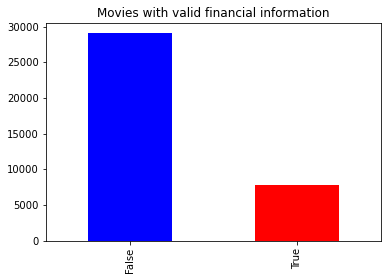

False    29052
True      7835
dtype: int64

In [8]:
fin = df_fin.value_counts()

#Let's give it some color
fin.plot(kind = 'bar', color = ['blue','red'])
plt.title('Movies with valid financial information')
plt.show()

fin

- From the above, it looks like 7835 movies had valid financial information (values > 0 for budget OR revenue). 

### b. How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [9]:
plotdf = tmd_movies.loc[df_fin]
movie_cat = plotdf['certification'].value_counts().sort_values()
movie_cat

Unrated       1
NC-17        20
G            83
PG          405
NR          618
PG-13      1017
R          1640
Name: certification, dtype: int64

- The above output has the number of movies in each certification category. The values on the left are the certification categories. The values on the right are the numbers of movies.

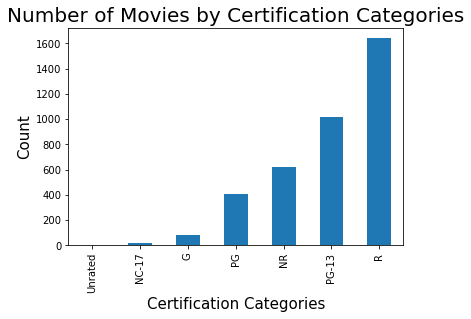

Unrated       1
NC-17        20
G            83
PG          405
NR          618
PG-13      1017
R          1640
Name: certification, dtype: int64

In [10]:
movie_cat.plot(kind = 'bar')
plt.title('Number of Movies by Certification Categories', fontsize = 20)
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Certification Categories', fontsize = 15)

#Show your figure
plt.show()

#Display the count chart the plot
movie_cat

- The above plot shows the number of movies in each certification category. 

### c. What is the average revenue per certification category?

Text(0.5, 1.0, 'Average revenue per certification category')

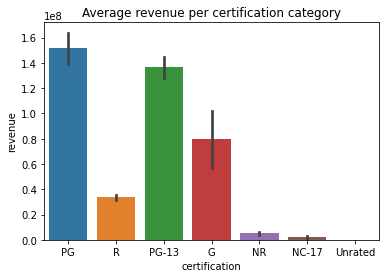

In [11]:
ax = sns.barplot(data=plotdf , x = 'certification', y = 'revenue', ci = 68)
ax.set_title('Average revenue per certification category')

- The above plot has the average revenue per certification category. 

- It is obvious that the 'PG' category has the highest average revenue

In [12]:
plotdf.groupby('certification')['revenue'].mean()

certification
G          8.001068e+07
NC-17      2.237721e+06
NR         5.111411e+06
PG         1.517992e+08
PG-13      1.364204e+08
R          3.361867e+07
Unrated    0.000000e+00
Name: revenue, dtype: float64

- The above output has the average revenue per certification category. The values on the left are the certification categories. The values on the right are the revenues.

- It is obvious that 'PG' category has the highest average revenue

### d. What is the average budget per certification category?

certification
G          2.536730e+07
NC-17      1.758680e+06
NR         2.524910e+06
PG         4.409978e+07
PG-13      4.164467e+07
R          1.376490e+07
Unrated    2.600000e+02
Name: budget, dtype: float64

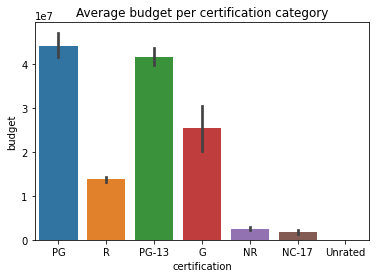

In [13]:
ax = sns.barplot(data=plotdf, x = 'certification', y = 'budget', ci = 68)
ax.set_title('Average budget per certification category')
plotdf.groupby('certification')['budget'].mean()

- The above output and plot have the average budget per certification category. 

- It is obvious that 'PG' category has the highest average budget



## 3. Save a final merged .csv.gz of all of the tmdb api data

In [14]:
## Save merged dataframe to file. Saved in 'Data' folder
tmd_movies.to_csv("Data/tmdb_results_combined.csv.gz",compression='gzip',index=False)

In [15]:
## Save merged dataframe to file. Saved in Home page
tmd_movies.to_csv("tmdb_results_combined.csv.gz",compression='gzip',index=False)